# How to Run UncertaintyForest

This set of four tutorials (`uncertaintyforest_running_example.ipynb`, `uncertaintyforest_posteriorestimates.ipynb`, `uncertaintyforest_conditionalentropyestimates.ipynb`, and `uncertaintyforest_mutualinformationestimates.ipynb`) will explain the UncertaintyForest class. After following these tutorials, you should have the ability to run UncertaintyForest on your own machine and generate Figures 1, 2, and 3 from [this paper](https://arxiv.org/pdf/1907.00325.pdf), which help you to visualize a comparison of the estimated posteriors and conditional entropy values for several different algorithms.

If you haven't seen it already, take a look at other tutorials to setup and install the ProgLearn package: `installation_guide.ipynb`.

*Goal: Train the UncertaintyForest classifier on some training data and produce a metric of accuracy on some test data*

## Import required packages and set parameters for the forest 

In [1]:
from proglearn.forest import UncertaintyForest
from proglearn.sims import generate_gaussian_parity

In [2]:
# Real Params.
n_train = 50000 # number of training data points
n_test = 1000 # number of testing data points
num_trials = 10 # number of trials
n_estimators = 100 # number of estimators

#### We've done a lot. Can we just run it now? Yes!

## Create and train our UncertaintyForest 
First, generate our data:

In [3]:
X, y = generate_gaussian_parity(n_train+n_test)

Now, split that data into training and testing data. We don't want to accidently train on our test data.

In [4]:
X_train = X[0:n_train] # Takes the first n_train number of data points and saves as X_train
y_train = y[0:n_train] # same as above for the labels
X_test = X[n_train:] # Takes the remainder of the data (n_test data points) and saves as X_test
y_test = y[n_train:] # same as above for the labels

In [5]:
import numpy as np
import math
from sklearn.preprocessing import KBinsDiscretizer

def KBinsDiscretize(data_x, n_bins=0, alpha=3.322, encode="ordinal", strategy="uniform"):
    """
        
    """
   # Makes n_bins optional, calculates optimal n_bins by default
   # Sturges Rule - num_bins = 1 + 3.322 * log_10(num_inputs)
    if n_bins == 0:
        # cap bins at 256
        n_bins = min(math.floor(1 + alpha * math.log10(data_x.shape[0])), 256)

    kbins = KBinsDiscretizer(n_bins, encode='ordinal', strategy='uniform')
    kbins.fit(data_x)
    binned_x = kbins.transform(data_x)
    return binned_x

In [23]:
X_train_binned = []
for n_bins in range(0, n_train, 1000):
    X_train_binned.append(KBinsDiscretize(X_train, n_bins))

Then, create our forest:

Then fit our learner:

In [24]:
import timeit
    
    
bins = 1000
count = 0
x_bins = []
UF_binned = []
training_times = []
for x in X_train_binned:
    UF = UncertaintyForest(n_estimators = n_estimators)
    starttime = timeit.default_timer()
    UF_binned.append(UF.fit(x, y_train))
    x_bins.append(bins)
    training_times.append(timeit.default_timer() - starttime)
    bins += 1000
    count += 1
    print("Training UF " + str(count) + " of " + str(len(X_train_binned)))


Training UF 1 of 50
Training UF 2 of 50
Training UF 3 of 50
Training UF 4 of 50
Training UF 5 of 50
Training UF 6 of 50
Training UF 7 of 50
Training UF 8 of 50
Training UF 9 of 50
Training UF 10 of 50
Training UF 11 of 50
Training UF 12 of 50
Training UF 13 of 50
Training UF 14 of 50
Training UF 15 of 50
Training UF 16 of 50
Training UF 17 of 50
Training UF 18 of 50
Training UF 19 of 50
Training UF 20 of 50
Training UF 21 of 50
Training UF 22 of 50
Training UF 23 of 50
Training UF 24 of 50
Training UF 25 of 50
Training UF 26 of 50
Training UF 27 of 50
Training UF 28 of 50
Training UF 29 of 50
Training UF 30 of 50
Training UF 31 of 50
Training UF 32 of 50
Training UF 33 of 50
Training UF 34 of 50
Training UF 35 of 50
Training UF 36 of 50
Training UF 37 of 50
Training UF 38 of 50
Training UF 39 of 50
Training UF 40 of 50
Training UF 41 of 50
Training UF 42 of 50
Training UF 43 of 50
Training UF 44 of 50
Training UF 45 of 50
Training UF 46 of 50
Training UF 47 of 50
Training UF 48 of 50
T

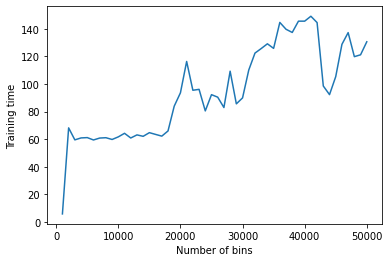

In [26]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_bins, training_times)
plt.xlabel("Number of bins")
plt.ylabel("Training time")
plt.show()

Well, we're done. Exciting right?

## Produce a metric of accuracy for our learner
We've now created our learner and trained it. But to actually show if what we did is effective at predicting the class labels of the data, we'll create some test data (with the same distribution as the train data) and see if we classify it correctly.

In [20]:
X_test, y_test = generate_gaussian_parity(n_test) # creates the test data
accuracies = []
for forest in UF_binned:
    predictions = forest.predict(X_test, task_id=0)
    accuracy = sum(predictions == y_test)/n_test
    accuracies.append(accuracy)

In [16]:
predictions_binned = []
accuracy_binned = []
for x in UF_binned:
    X_test, y_test = generate_gaussian_parity(n_test) # creates the test data
    predictions = x.predict(X_test, task_id=0) # predict the class labels of the test data
    accuracy = sum(predictions == y_test)/n_test
    accuracy_binned.append(accuracy)


[0.5, 0.497, 0.495, 0.485, 0.513, 0.479, 0.5, 0.494, 0.502, 0.512, 0.492, 0.493, 0.492, 0.51, 0.493, 0.507, 0.519, 0.504, 0.512, 0.504, 0.504, 0.516, 0.514, 0.496, 0.528]


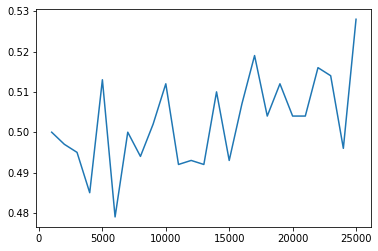

In [22]:
print(accuracy_binned)
plt.plot(x_bins, accuracy_binned)

To see the learner's accuracy, we'll now compare the predictions with the actual test data labels. We'll find the number correct and divide by the number of data.

In [21]:
predictions = UF_binned[1].predict(X_test, task_id=0) # predict the class labels of the test data
accuracy = sum(predictions == y_test)/n_test

And, let's take a look at our accuracy:

In [19]:
print(accuracy)


0.528


Ta-da. That's an uncertainty forest at work. 


## What's next?

See metrics on the power of UncertaintyForest by generating Figures 1 and 2 from [this paper](https://arxiv.org/pdf/1907.00325.pdf).

To do this, check out `uncertaintyforest_fig1.ipynb` and `uncertaintyforest_fig2.ipynb`.